# Seed05 Control vs. Mutation Up Selection Experiments

In this notebook I will graph out the results of two experiments in which I removed the line "CHROMOSOME_INITIAL_LENGTH   5000" from the parameter files in an attempt to figure out why the previous data (with this line in the parameter files intact) looks so wrong. These are 100,000 generations of seed05's *control* and *mutation down* conditions. 

## Read in the data

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from ReadFunctions import read_bp, read_fitness, read_genes

WINDOW_SIZE = 10000 # Size of the rolling window for smoothing

# INPUT_ROOT_DIR is the directory where our data is stored and OUTPUT_ROOT_DIR is where we want to output the graphical results.


# LAPTOP DIRECTORIES

# New data (i.e. with CHROMOSOME_INITIAL_LENGTH 5000 removed)
INPUT_ROOT_DIR_NEW = "C://Users//davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//Selection_Experiments//No_Initial_Genome_Length_Specified//" 
# Old data (i.e. with CHROMOSOME_INITIAL_LENGTH 5000 kept)
INPUT_ROOT_DIR_OLD = "C://Users//davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//seed05//"


# DESKTOP DIRECTORIES

# New data (i.e. with CHROMOSOME_INITIAL_LENGTH 5000 removed)
#INPUT_ROOT_DIR_NEW = "C://Users//Brian Davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//seed05//Selection_Experiments//No_Initial_Genome_Length_Specified//" # Desktop

# Old data (i.e. with CHROMOSOME_INITIAL_LENGTH 5000 kept)
#INPUT_ROOT_DIR_OLD = "C://Users//Brian Davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//seed05//"


# This is the same for both the LAPTOP and DESKTOP
OUTPUT_ROOT_DIR = INPUT_ROOT_DIR_NEW + "Graphics//"


# The column names in stat_fitness_best.out
#fitness_best_names = ['generation', 'population_size', 'fitness', 'genome_size', 'metabolic_error', 'parents_metabolic_error', 'metabolic_fitness', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amount_of_compound']

print("Reading in data files...")

# New data
df_seed05_control_fitness_best_new = read_fitness(INPUT_ROOT_DIR_NEW + "control//stats//stat_fitness_best.out")#, skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)
df_seed05_mutation_up_fitness_best_new = read_fitness(INPUT_ROOT_DIR_NEW + "mut_up//stats//stat_fitness_best.out")#,skiprows=17, delim_whitespace=True, header=0, names=fitness_best_names)

# Old data
df_seed05_control_fitness_best_old = read_fitness(INPUT_ROOT_DIR_OLD + "control//stats//stat_fitness_best.out")#, skiprows=17, nrows=100000, delim_whitespace=True, header=0, names=fitness_best_names)
df_seed05_mutation_up_fitness_best_old = read_fitness(INPUT_ROOT_DIR_OLD + "mut_up//stats//stat_fitness_best.out")#, skiprows=17, nrows=100000, delim_whitespace=True, header=0, names=fitness_best_names)

# Since the old data went to generation 500,000 and the new data only goes to 100,000, we'll drop the last 400,000
df_seed05_control_fitness_best_old = df_seed05_control_fitness_best_old[:100000]
df_seed05_mutation_up_fitness_best_old = df_seed05_mutation_up_fitness_best_old[:100000]
print("done.")

Reading in data files...
done.


## Graph the genome size

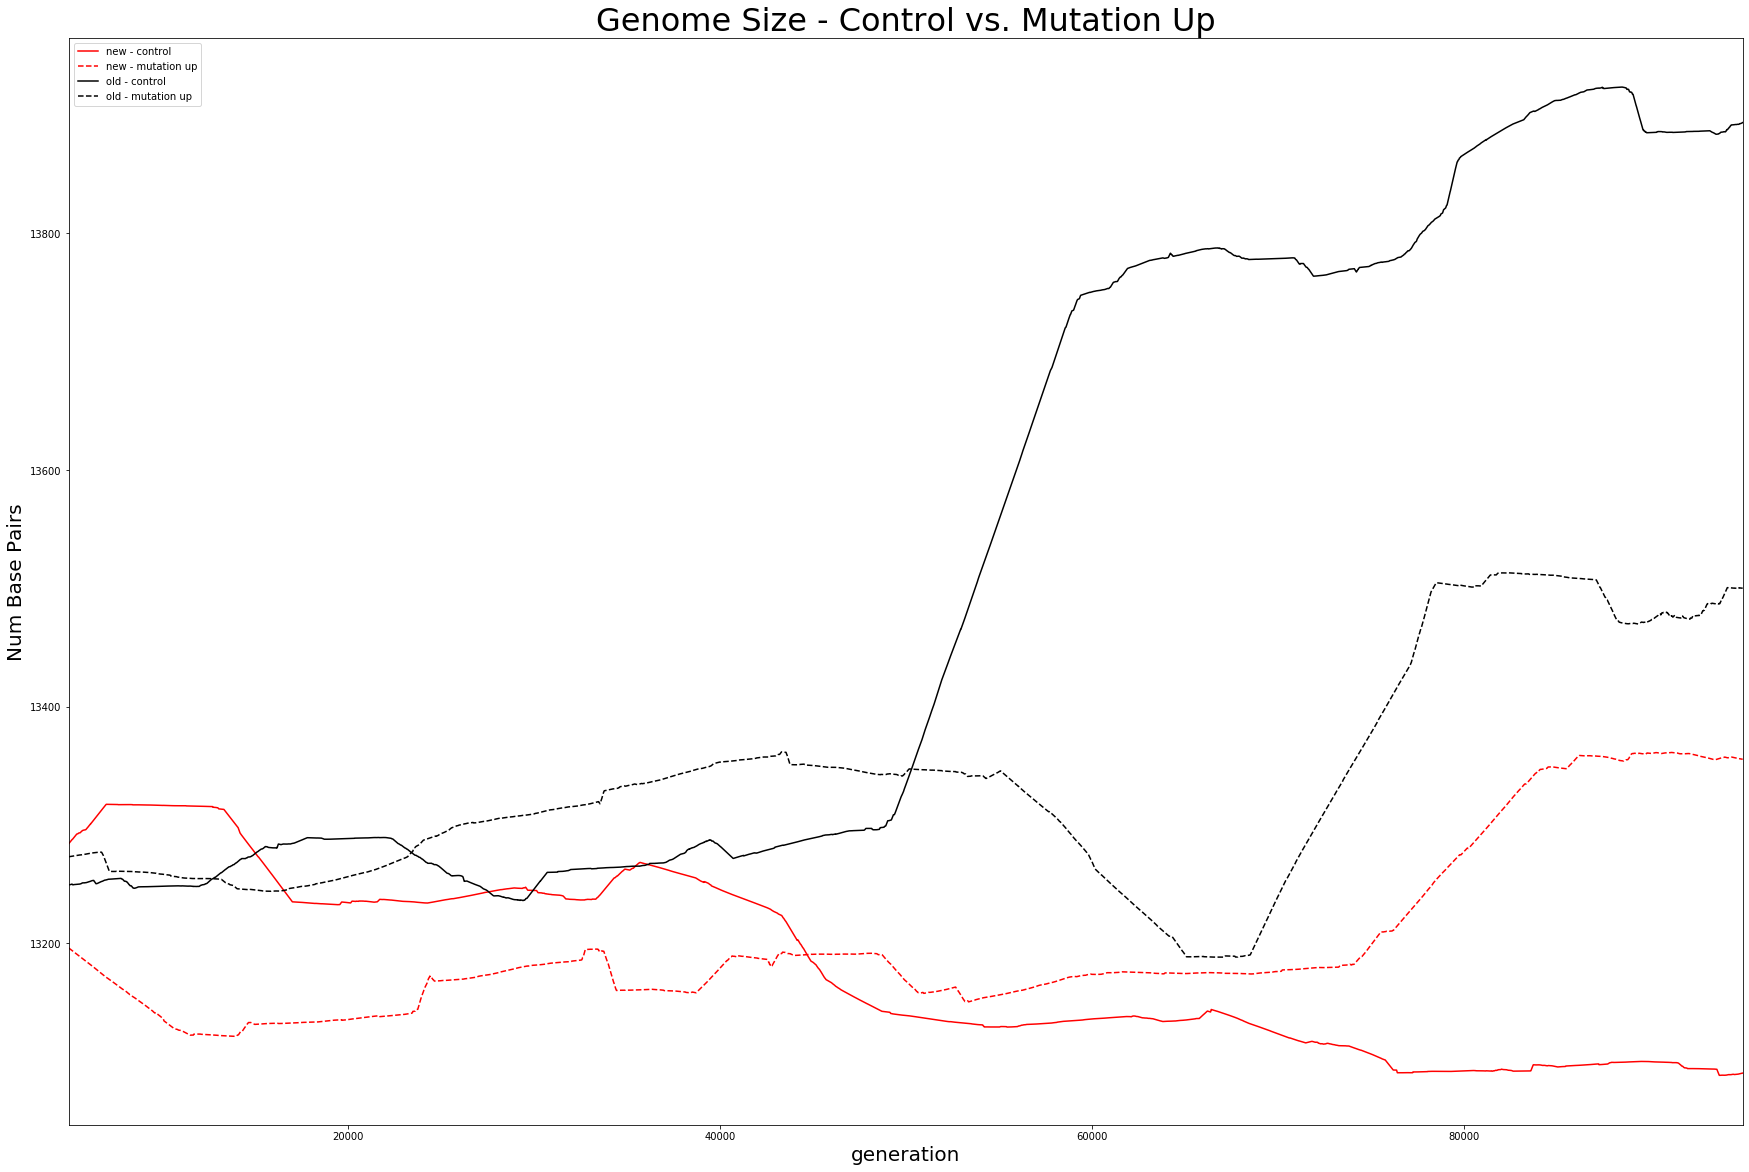

In [6]:
# Create new figure
fig_genome_size_best = plt.figure(figsize=(30,20))
ax_genome_size_best = fig_genome_size_best.add_subplot(111)
ax_genome_size_best.set_title("Genome Size - Control vs. Mutation Up", fontsize=32)
ax_genome_size_best.set_xlabel("Generation", fontsize=20)
ax_genome_size_best.set_ylabel("Num Base Pairs", fontsize=20)

# Plot the results to the figure. For each plot, smooth plot by using rolling window
# of average of $WINDOW_SIZE points, rather than all data points
df_tmp1 = df_seed05_control_fitness_best_new[['generation', 'genome_size']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp1.plot(x='generation', y='genome_size', color=(1.0,0.0,0.0), label='new - control', ax=ax_genome_size_best)

df_tmp2 = df_seed05_mutation_up_fitness_best_new[['generation', 'genome_size']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp2.plot(x='generation', y='genome_size', linestyle='dashed', color=(1.0,0.0,0.0), label='new - mutation up', ax=ax_genome_size_best)

df_tmp3 = df_seed05_control_fitness_best_old[['generation', 'genome_size']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp3.plot(x='generation', y='genome_size', color=(0.0, 0.0, 0.0), label='old - control', ax=ax_genome_size_best)

df_tmp4 = df_seed05_mutation_up_fitness_best_old[['generation', 'genome_size']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp4.plot(x='generation', y='genome_size', linestyle='dashed', color=(0.0, 0.0, 0.0), label='old - mutation up', ax=ax_genome_size_best)

# Save the figure
fig_genome_size_best.savefig(OUTPUT_ROOT_DIR + "genome_size-control_vs_mutation_up.png")

# Clear the temp DataFrames
del df_tmp1, df_tmp2, df_tmp3, df_tmp4

## Graph the fitness

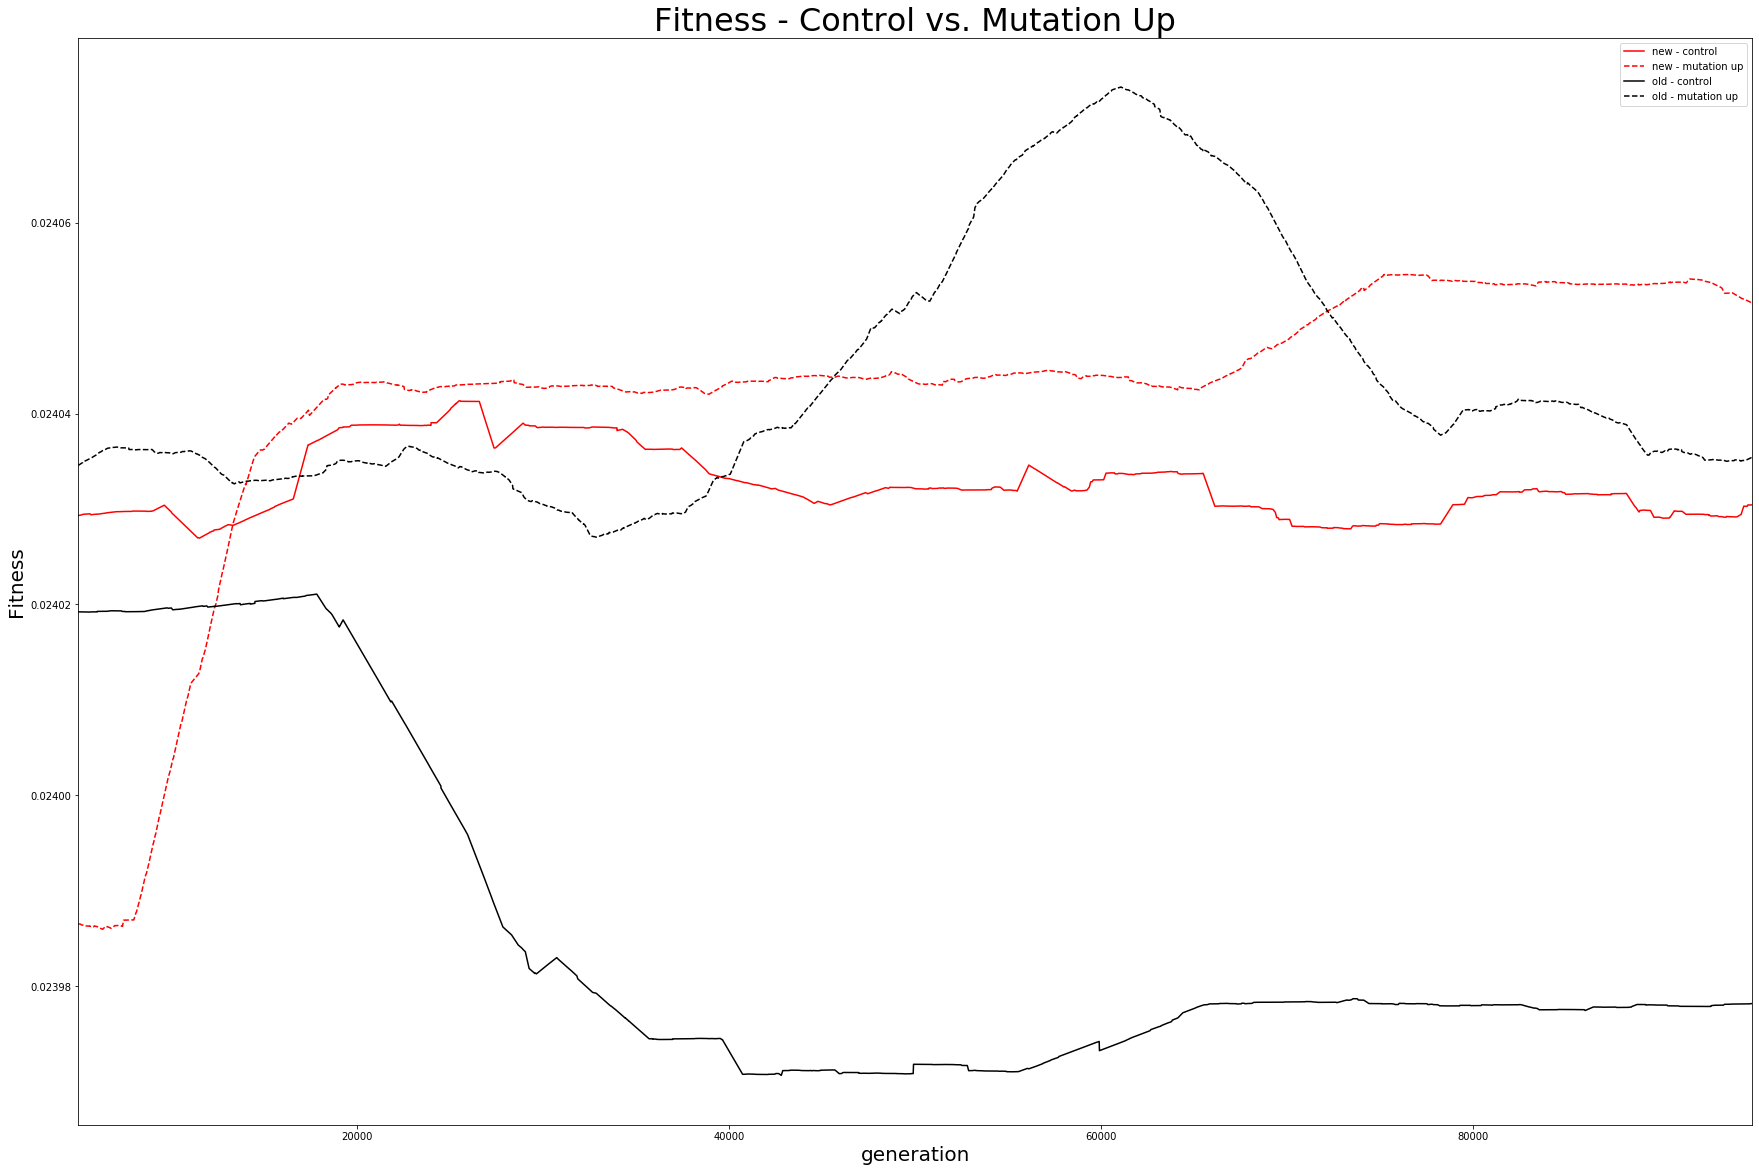

In [7]:
# Create new figure
fig_fitness_best = plt.figure(figsize=(30,20))
ax_fitness_best = fig_fitness_best.add_subplot(111)
ax_fitness_best.set_title("Fitness - Control vs. Mutation Up", fontsize=32)
ax_fitness_best.set_xlabel("Generation", fontsize=20)
ax_fitness_best.set_ylabel("Fitness", fontsize=20)

# Create the necessary DataFrames
df_tmp1 = df_seed05_control_fitness_best_new[['generation', 'fitness']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp2 = df_seed05_mutation_up_fitness_best_new[['generation', 'fitness']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp3 = df_seed05_control_fitness_best_old[['generation', 'fitness']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp4 = df_seed05_mutation_up_fitness_best_old[['generation', 'fitness']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()

# Graph the results
df_tmp1.plot(x='generation', y='fitness', color=(1.0,0.0,0.0), label='new - control', ax=ax_fitness_best)
df_tmp2.plot(x='generation', y='fitness', linestyle='dashed', color=(1.0,0.0,0.0), label='new - mutation up', ax=ax_fitness_best)
df_tmp3.plot(x='generation', y='fitness', color=(0.0, 0.0, 0.0), label='old - control', ax=ax_fitness_best)
df_tmp4.plot(x='generation', y='fitness', linestyle='dashed', color=(0.0, 0.0, 0.0), label='old - mutation up', ax=ax_fitness_best)



# Clear the temp DataFrames
del df_tmp1, df_tmp2, df_tmp3, df_tmp4

## Load the data for non-coding base pairs

In [19]:
df_seed05_control_bp_best_new = read_bp(INPUT_ROOT_DIR_NEW + "control//stats//stat_genes_best.out")
df_seed05_mutation_up_best_new = read_bp(INPUT_ROOT_DIR_NEW + "mut_up//stats//stat_genes_best.out")

df_seed05_control_bp_best_old = read_bp(INPUT_ROOT_DIR_OLD + "control//stats//stat_genes_best.out")
df_seed05_mutation_up_best_old = read_bp(INPUT_ROOT_DIR_OLD + "mut_up//stats//stat_genes_best.out")

# Again since the old data goes to generation 500,000 we need to drop the last 400,000 entries

df_seed05_control_bp_best_old = df_seed05_control_bp_best_old[:100000]
df_seed05_mutation_up_best_old = df_seed05_mutation_up_best_old[:100000]

## Graph the number of non-coding base pairs

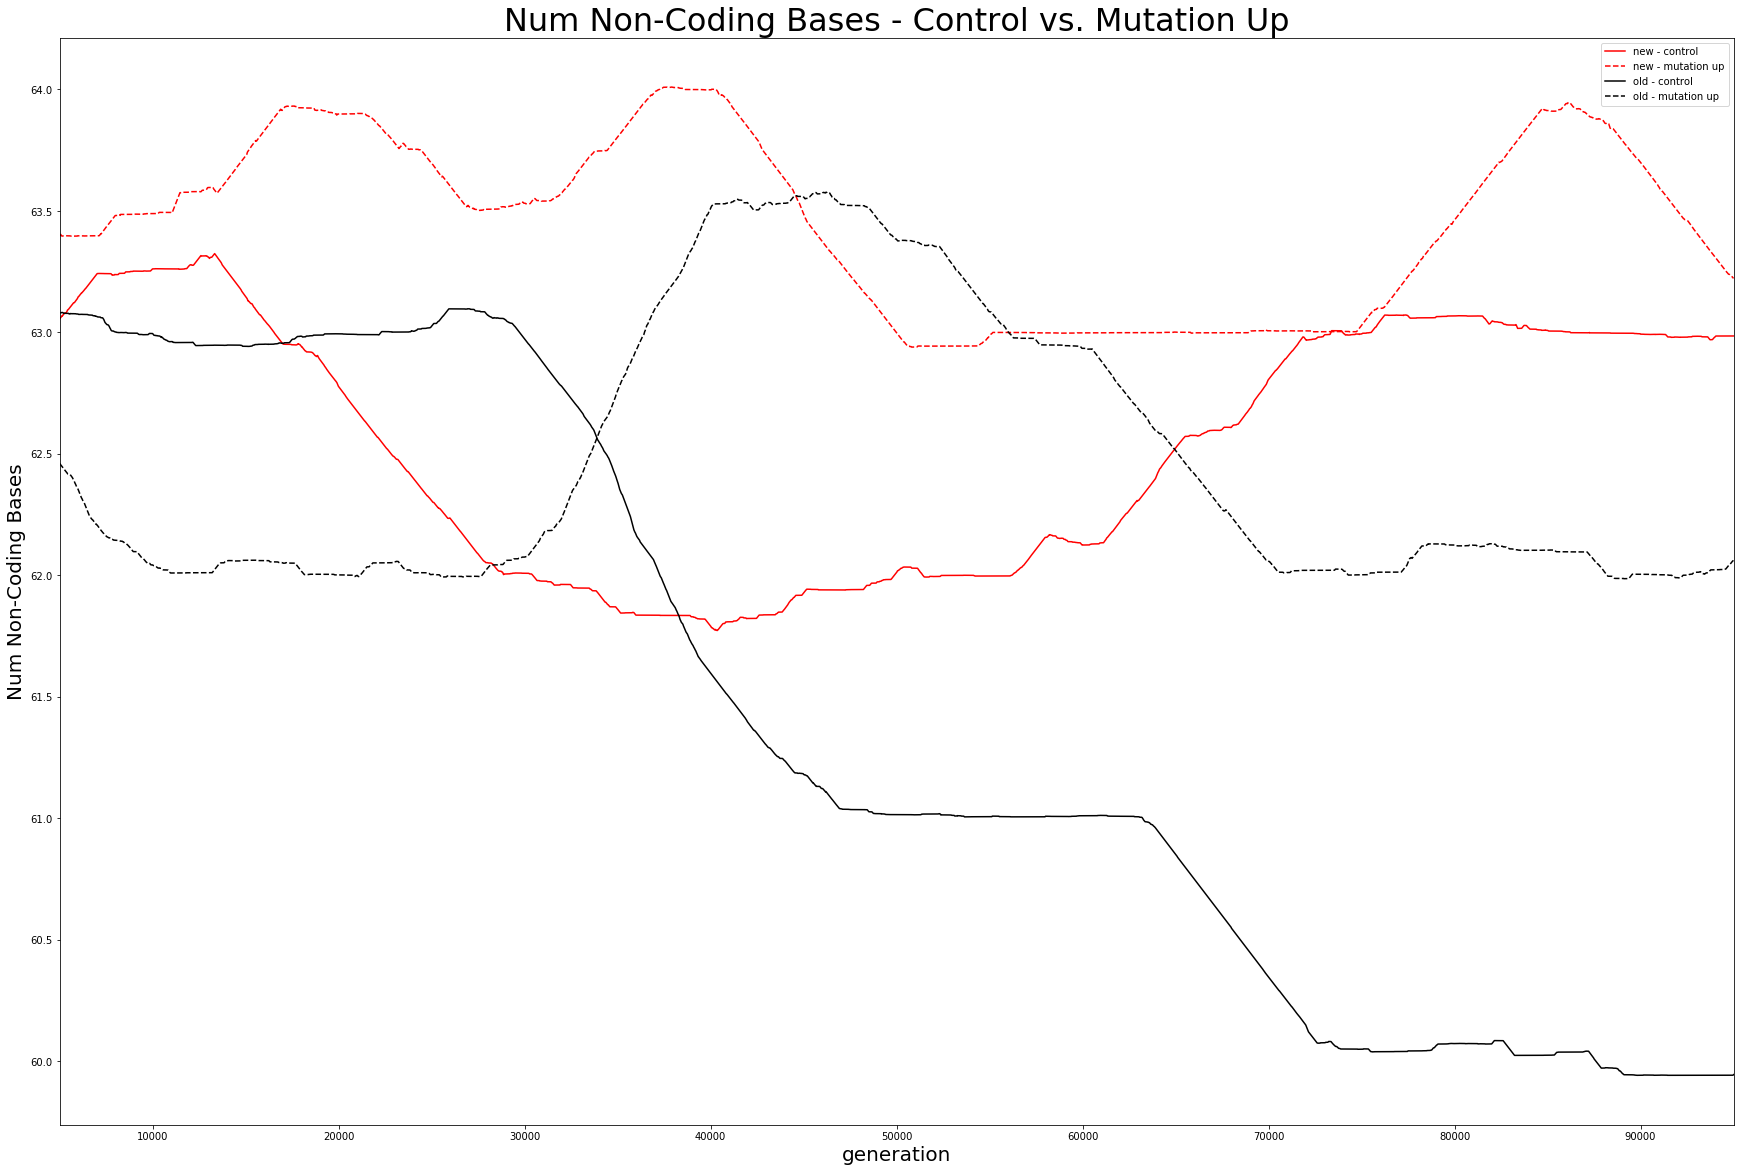

In [20]:
# Create new figure
fig_num_noncoding_bases_best = plt.figure(figsize=(30,20))
ax_num_noncoding_bases_best = fig_num_noncoding_bases_best.add_subplot(111)
ax_num_noncoding_bases_best.set_title("Num Non-Coding Bases - Control vs. Mutation Up", fontsize=32)
ax_num_noncoding_bases_best.set_xlabel("Generation", fontsize=20)
ax_num_noncoding_bases_best.set_ylabel("Num Non-Coding Bases", fontsize=20)

# Create the necessary DataFrames
df_tmp1_control_new = df_seed05_control_bp_best_new[['generation', 'num_bp_not_in_any_CDS']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp2_mutation_up_new = df_seed05_mutation_up_best_new[['generation', 'num_bp_not_in_any_CDS']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp3_control_old = df_seed05_control_bp_best_old[['generation', 'num_bp_not_in_any_CDS']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp4_mutation_up_old = df_seed05_mutation_up_best_old[['generation', 'num_bp_not_in_any_CDS']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()

# Graph the results
df_tmp1_control_new.plot(x='generation', y='num_bp_not_in_any_CDS', color=(1.0,0.0,0.0), label='new - control', ax=ax_num_noncoding_bases_best)
df_tmp2_mutation_up_new.plot(x='generation', y='num_bp_not_in_any_CDS', linestyle='dashed', color=(1.0,0.0,0.0), label='new - mutation up', ax=ax_num_noncoding_bases_best)
df_tmp3_control_old.plot(x='generation', y='num_bp_not_in_any_CDS', color=(0.0, 0.0, 0.0), label='old - control', ax=ax_num_noncoding_bases_best)
df_tmp4_mutation_up_old.plot(x='generation', y='num_bp_not_in_any_CDS', linestyle='dashed', color=(0.0, 0.0, 0.0), label='old - mutation up', ax=ax_num_noncoding_bases_best)

del df_tmp1_control_new, df_tmp2_mutation_up_new, df_tmp3_control_old, df_tmp4_mutation_up_old

## Number of Genes

### Load the data

In [14]:
print("Reading in data...")
df_seed05_control_new = read_genes(INPUT_ROOT_DIR_NEW + "control//stats//stat_genes_best.out")
df_seed05_mutation_up_new = read_genes(INPUT_ROOT_DIR_NEW + "mut_up//stats//stat_genes_best.out")
df_seed05_control_old = read_genes(INPUT_ROOT_DIR_OLD + "control//stats//stat_genes_best.out")
df_seed05_mutation_up_old = read_genes(INPUT_ROOT_DIR_OLD + "mut_up//stats//stat_genes_best.out")

# Again since the old data went to generation 500,000 we need to only keep the first 100,000 generations
df_seed05_control_old = df_seed05_control_old[:100000]
df_seed05_mutation_up_old = df_seed05_mutation_up_old[:100000]
print("Done.")

Reading in data...
Done.


### Graph the Number of Genes

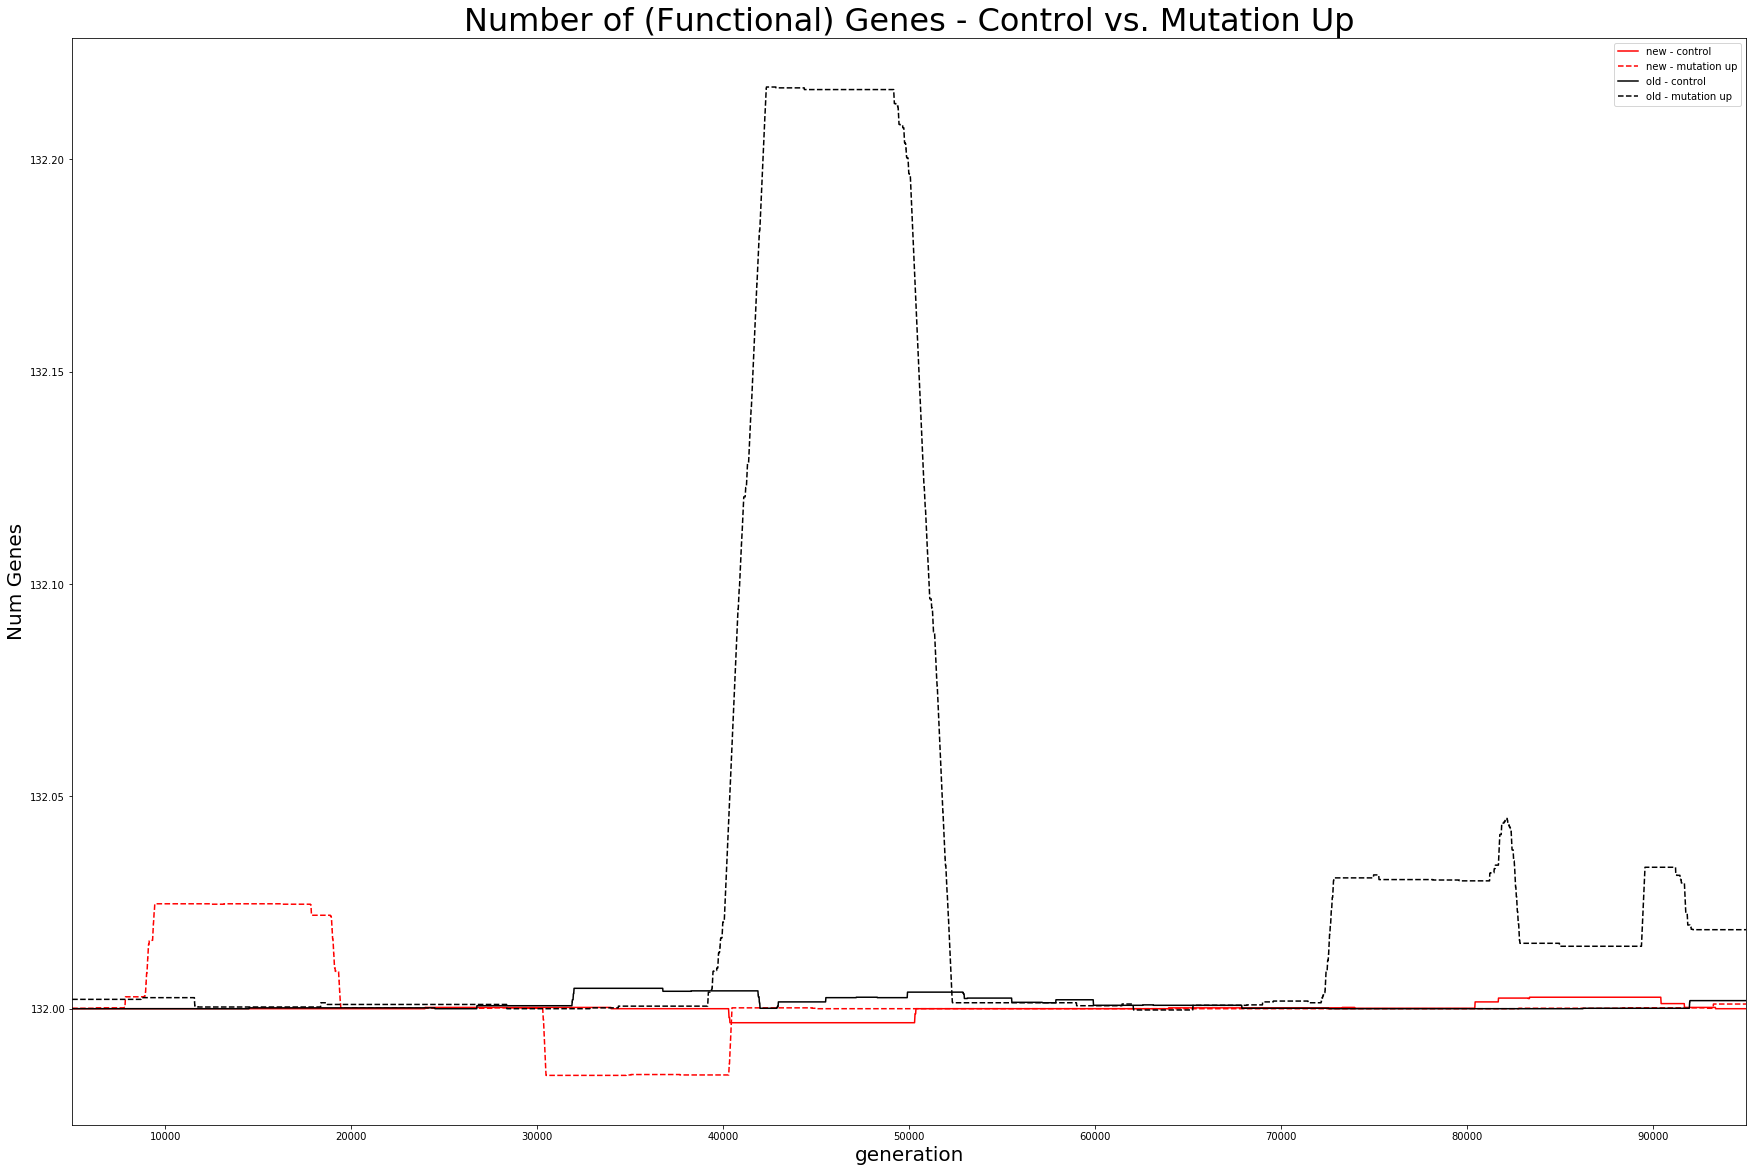

In [18]:
fig_num_genes_best = plt.figure(figsize=(30,20))
ax_num_genes_best = fig_num_genes_best.add_subplot(111)
ax_num_genes_best.set_title("Number of (Functional) Genes - Control vs. Mutation Up", fontsize=32)
ax_num_genes_best.set_xlabel("Generation", fontsize=20)
ax_num_genes_best.set_ylabel("Num Genes", fontsize=20)

# Create temp DataFrames for smoothing
df_tmp1_control_new = df_seed05_control_new[['generation', 'num_functional_genes']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp2_mutation_up_new = df_seed05_mutation_up_new[['generation', 'num_functional_genes']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp3_control_old = df_seed05_control_old[['generation', 'num_functional_genes']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
df_tmp4_mutation_up_old = df_seed05_mutation_up_old[['generation', 'num_functional_genes']].copy().rolling(window=WINDOW_SIZE, axis='rows').mean()
 

df_tmp1_control_new.plot(x='generation', y='num_functional_genes', label='new - control', color=(1.0, 0.0, 0.0), ax=ax_num_genes_best)
df_tmp2_mutation_up_new.plot(x='generation', y='num_functional_genes', linestyle='dashed', label='new - mutation up', color=(1.0, 0.0, 0.0), ax=ax_num_genes_best)
df_tmp3_control_old.plot(x='generation', y='num_functional_genes', label='old - control', color=(0.0, 0.0, 0.0), ax=ax_num_genes_best)
df_tmp4_mutation_up_old.plot(x='generation', y='num_functional_genes', linestyle='dashed', label='old - mutation up', color=(0.0, 0.0, 0.0), ax=ax_num_genes_best)

## Robustness